In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:

raw_tertiary_educ = te.getEurostatData(country = 'portugal', category = 'Unemployment rate: Tertiary education (levels 5-8)', output_type = 'df')
raw_upper_secondary_educ = te.getEurostatData(country = 'portugal', category = 'Unemployment rate: Upper secondary and post-secondary non-tertiary education (levels 3 and 4)', output_type = 'df')
raw_males = te.getEurostatData(country = 'portugal', category = 'Unemployment rate: Males', output_type = 'df')
raw_females = te.getEurostatData(country = 'portugal', category = 'Unemployment rate: Females', output_type = 'df')
raw_lower_secondary_educ = te.getEurostatData(country = 'portugal', category = 'Unemployment rates of the population aged 25-64: Less than primary, primary and lower secondary education (levels 0-2)', output_type = 'df')


In [4]:
frames = [raw_lower_secondary_educ[[ 'LatestValue','PreviousValue']],raw_upper_secondary_educ[['LatestValue','PreviousValue']], raw_tertiary_educ[['LatestValue','PreviousValue']],raw_males[['LatestValue','PreviousValue']], raw_females[['LatestValue','PreviousValue']]]

df = pd.concat(frames)
df['Difference'] = df['LatestValue'] - df['PreviousValue']

new_title = ['Less than Secondary', 'Upper Secondary and more', 'Tertiary', 'Males', 'Females']
df['Category Name'] = new_title

df.set_index('Category Name')

,LatestValue,PreviousValue,Difference
Category Name,,,
Less than Secondary,6.2,6.4,-0.2
Upper Secondary and more,8.4,7.2,1.2
Tertiary,5.8,5.3,0.5
Males,6.6,5.9,0.7
Females,7.1,7.2,-0.1


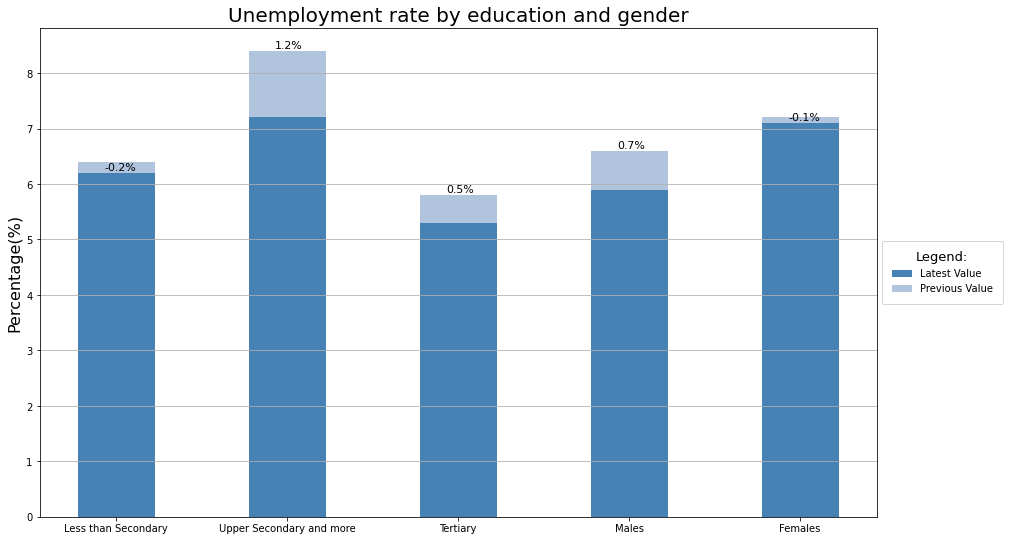

In [5]:
labels = new_title
before_values = df['PreviousValue'].values.tolist()
difference_values = df['Difference'].values.tolist()

width = 0.45    

fig, ax = plt.subplots(figsize=(15, 9))

ax.bar(labels, before_values, width, label='Latest Value',color='steelblue')
ax.bar(labels, difference_values, width, bottom=before_values,
       label='Previous Value', color='lightsteelblue')

ax.set_ylabel('Percentage(%)', size=16)
ax.set_title('Unemployment rate by education and gender', color='black', size=20)

plt.legend(
          title="Legend:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10,
          ncol=1,
          title_fontsize=13,
          borderpad=1)
#plt.grid(True)

for index,data in enumerate(difference_values):
        plt.text(x=index-0.07 , y =before_values[index]+difference_values[index]+0.05 , s=f"{round(data,2)}%" , fontdict=dict(fontsize=11, color='black'))
ax.yaxis.grid(zorder=0)
plt.show()